In [4]:
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
from Classifiers import TransparentRidge
from Classifiers import TransparentLasso
from scipy.sparse import diags
import matplotlib.pyplot as plt
import PredictiveModels as pm
import pandas as pd
from LatestPreprocessing import *

# User Transparency

In [5]:
pd.set_option('display.width', 100)
user_stats = pd.read_csv('ml-latest/user_stats.csv', sep = ',',nrows=20)
print user_stats.head(10)

   User ID  Number of Ratings  Average Rating  Variance  Genre Ratio  \
0   242763               1929           2.875     4.092            0   
1    28451               1274           2.813     3.909            0   
2    87971               1181           3.383     3.426            0   
3   155440               1028           2.631     3.292            0   
4    60484               1224           2.054     3.114            0   
5   120899               2031           2.662     2.356            0   
6    46262                747           2.509     3.603            0   
7   225941               1646           1.797     2.348            0   
8   170099               2067           3.215     2.179            0   
9   234450               1798           2.885     2.215            0   

   Key Ratio  Fitness  
0      0.040    0.369  
1      0.086    0.305  
2      0.065    0.278  
3      0.085    0.245  
4      0.077    0.234  
5      0.022    0.214  
6      0.159    0.202  
7      0.037   

## Loading user matrix

In [6]:
userid = 242763
user_ratings = get_matched_user_ratings(userid)
movies = user_ratings.keys()
ratings = user_ratings.values()
print "User average rating: ", np.average(ratings)
print "Number of movies rated by this user: ", len(ratings)

TypeError: 'numpy.ndarray' object is not callable

In [5]:
print "Loading average and number of rating"
id_dict = get_id_row_dict()
idxs = [id_dict[k] for k in movies]
avg_and_num = sort_avg()

Loading average and number of rating


## Highest rated movies

In [6]:
movie_set = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
avg_df = df(np.column_stack((movie_set.title,avg_and_num)), columns = ("Movie", "Average Rating", "Number of Ratings"))
print avg_df.loc[avg_df["Number of Ratings"] > 100].sort(["Average Rating", "Number of Ratings"], ascending=[0,0]).head(20)

                                                   Movie Average Rating Number of Ratings
10075                    THE SHAWSHANK REDEMPTION (1994)       4.442559             77367
6085                                THE GODFATHER (1972)       4.354139             49554
3561                           THE USUAL SUSPECTS (1995)       4.319778             52957
18479                            SCHINDLER'S LIST (1993)       4.292279             59539
20916                      THE GODFATHER: PART II (1974)       4.269065             32048
18913                        SHICHININ NO SAMURAI (1954)       4.263744             12696
6943                                  REAR WINDOW (1954)       4.248423             19338
10182             ONE FLEW OVER THE CUCKOO'S NEST (1975)       4.243332             35657
15480                                  FIGHT CLUB (1999)       4.234274             48471
8583                                   CASABLANCA (1942)       4.233015             27715
12624  DR.

In [7]:
all_names = get_movie_names()
names = all_names[idxs]
rating_df = df(np.column_stack((names,ratings)), columns = ("Movie", "Rating"))
print rating_df.sort(["Rating"], ascending=0).head(20)

                                         Movie Rating
0             THE GREAT MOUSE DETECTIVE (1986)      5
762             FLIGHT OF THE NAVIGATOR (1986)      5
761  DARBY O'GILL AND THE LITTLE PEOPLE (1959)      5
758                  BLACKBEARD'S GHOST (1968)      5
4           FATHER OF THE BRIDE PART II (1995)      5
754                    ON MOONLIGHT BAY (1951)      5
6                               SABRINA (1995)      5
751          BACK TO THE FUTURE PART II (1989)      5
105                           PETER PAN (1953)      5
746                           WIMBLEDON (2004)      5
199                       JURASSIC PARK (1993)      5
735            THE EMPEROR'S NEW GROOVE (2000)      5
215          10 THINGS I HATE ABOUT YOU (1999)      5
733                            CHOCOLAT (2000)      5
731        PLANES, TRAINS & AUTOMOBILES (1987)      5
234                   FINDING NEVERLAND (2004)      5
16                      THE JUNGLE BOOK (1967)      5
239                       HE

## User rating distribution

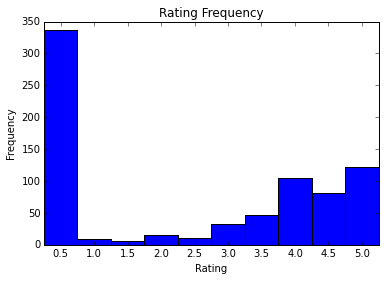

In [8]:
x = ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Genre Distribution

In [10]:
print "Loading genre matrix"
genre_matrix = get_genre_matrix()[idxs]
genre_dict = get_genre_dict()
inv_map = {v: k for k, v in genre_dict.items()}
names = [inv_map[k] for k in range(len(genre_dict))]

Loading genre matrix


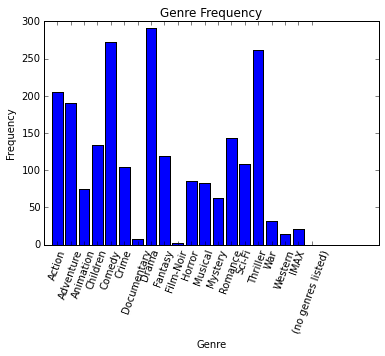

In [11]:
x = np.sum(genre_matrix, axis=0)
his = np.histogram(x, bins = range(0,21))
fig, ax = plt.subplots()
offset = 0
plt.bar(his[1][1:],x,align='center')
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels((list(names)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.title("Genre Frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [13]:
print "Loading key matrix"
keywords = pd.read_csv("ml-latest/matched_movies", delimiter='\t', usecols = [0,3], names = ['id', 'key'] )
x = get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
names = np.array([inv_map[k] for k in range(len(x))])
user_key_matrix = get_keyword_matrix()[idxs]

Loading key matrix
Number of popular keys:

 2336


## User Keyword Frequency

In [17]:
frequency = np.sum(user_key_matrix, axis=0, dtype = int)
indices = np.argsort(frequency)
keyword_df = df((np.column_stack((names[indices], frequency[indices]))), columns = ("Keyword", "Frequency"))
print keyword_df.sort(["Frequency"], ascending = 0).head(20)

                          Keyword Frequency
2261                     computer        99
2259                         snow        98
2260  brother-sister-relationship        98
2257                     marriage        97
2258                   cell-phone        97
2256                         gore        97
2254                      beating        96
2253                    deception        96
2255          hand-to-hand-combat        96
2251                       singer        95
2252                        horse        95
2250                  machine-gun        95
2249                      shotgun        94
2247                  watching-tv        93
2246                       crying        93
2245                          boy        93
2248                    face-slap        93
2244             good-versus-evil        92
2243             held-at-gunpoint        91
2242            slow-motion-scene        91


## User Actor Frequency

In [18]:
print "Loading actor matrix"
actor_matrix = get_actor_matrix()[idxs]
frequency = np.sum(actor_matrix, axis=0)
names = get_actor_names()
actor_df = df((np.column_stack((names, frequency))), columns = ("Actor", "Frequency"))
print actor_df.sort_index(by=["Frequency"], ascending = 0).head(20)

Loading actor matrix
                         Actor Frequency
776        Freeman, Morgan (I)       9.0
97               Flowers, Bess       9.0
337           Bacon, Kevin (I)       9.0
1123      Lee, Christopher (I)       9.0
348            Bale, Christian       9.0
1443  Plummer, Christopher (I)       9.0
820          Goodman, John (I)       9.0
806            Gibson, Mel (I)       9.0
1555       Rosales Jr., Thomas       9.0
1798             Weaving, Hugo       9.0
196            Newman, Laraine       9.0
707           Ellis, Chris (I)       9.0
232          Smith, Maggie (I)       9.0
475        Campbell, Bruce (I)       9.0
518             Cheung, George       9.0
566          Cooper, Chris (I)       9.0
553           Coltrane, Robbie       9.0
405         Boone Junior, Mark       8.0
1211         Martin, Steve (I)       8.0
1203        Marsden, James (I)       8.0

## Finding min alpha for user

In [49]:
pp.scale(avg_and_num[:,0], with_mean=True, with_std=True, copy=False)
pp.scale(avg_and_num[:,1], with_mean=True, with_std=True, copy=False)
data = np.column_stack((avg_and_num[idxs], genre_matrix, user_key_matrix, actor_matrix))
target = ratings
alphas = np.arange(.05,.8,.05)
min_ridge_mae = 2
avg_mae_list =list()
for alpha in alphas:
    mae_list = list()
    results = pm.get_ridge_cv_results(np.column_stack((data,target)), alpha, 10)
    mae = results[0]
    mae_list.append(results[0])
    if mae < min_ridge_mae:
        min_ridge_mae = mae
        min_ridge_alpha = alpha
        min_ridge_maes = mae_list
    avg_mae_list.append(mae)
print pd.DataFrame(np.column_stack((alphas,avg_mae_list)), columns = ['Alpha', 'MAE'])
print "Optimal alpha is: ", min_ridge_alpha

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Creating Ridge Model with Cross Validation and 5 Folds

In [19]:
results = pm.get_ridge_cv_results(np.column_stack((data,target)), min_ridge_alpha, 10)

y_pred = results[2]
ratings = user_ratings.values()
error_from_pred = np.abs(ratings-y_pred)

col_names = ["Movie ID" ,"User Rating","Model Prediction","Model Error"]

col_avg = ["Average:", np.average(ratings),np.average(y_pred),np.average(error_from_pred)]
user_result = np.column_stack((user_ratings.keys(), ratings, y_pred, error_from_pred))
user_result = user_result[np.argsort(user_result[:, 3])]
user_result = np.vstack((user_result,col_avg))

results_df = pd.DataFrame(user_result, columns = col_names)
print "Ten Lowest Errors"
print results_df.head(10)
print "\nTen Highest Errors"
print results_df.tail(10)

Ten Lowest Errors
  Movie ID User Rating Model Prediction       Model Error
0  44399.0         3.5    3.49755356098  0.00244643902357
1   2424.0         3.5    3.50276568286  0.00276568286104
2   2918.0         3.5    3.51815493847    0.018154938474
3  45720.0         3.0    3.01940312741   0.0194031274148
4   5651.0         3.0     2.9717476463   0.0282523537049
5   2054.0         4.0    4.03607113361   0.0360711336122
6  33493.0         3.0    2.96164179658   0.0383582034228
7  32383.0         3.0    2.95627380424    0.043726195757
8    780.0         3.0    2.95285596311   0.0471440368877
9  30825.0         3.0    3.04795702226   0.0479570222598

Ten Highest Errors
     Movie ID    User Rating Model Prediction    Model Error
755   52722.0            5.0    1.77970854438  3.22029145562
756    2683.0            0.5    3.78032433039  3.28032433039
757   45499.0            5.0    1.65604939866  3.34395060134
758    8972.0            5.0     1.6372186679   3.3627813321
759   51412.0      

## Creating Ridge Model with Full Training Set

In [30]:
clf =TransparentRidge(0.1)
user_cols = data.shape[1]+1
clf.fit(data,target)
weights = clf.coef_
neg_evi, pos_evi = clf.predict_evidences(data)
bias = clf.get_bias()
y_pred = clf.predict(data)
indices = np.argsort(y_pred)
coef_diags = diags(clf.coef_, 0)
dm = data * coef_diags

## Weights and Features

In [21]:
get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
key_names = [inv_map[k] for k in range(len(x))]
genre_names = get_genre_dict().keys()
actor_names = get_actor_names()
features = np.hstack([['Average Rating', 'Number of Ratings'], genre_names, key_names, actor_names])

positive_weight_indices = weights > 0
negative_weight_indices = weights < 0

positive_features = np.column_stack((features[positive_weight_indices], weights[positive_weight_indices].astype(float)))
negative_features = np.column_stack((features[negative_weight_indices], weights[negative_weight_indices].astype(float)))

positive_df = pd.DataFrame(positive_features, columns = ["Features", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)
positive_df = positive_df.sort("Weights", ascending=0)

negative_df = pd.DataFrame(negative_features, columns = ["Features", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

negative_df = negative_df.sort("Weights", ascending=1)

print positive_df.head(10)
print negative_df.head(10)

            Features   Weights
2             Horror  0.440074
1             Sci-Fi  0.406996
5     box-office-hit  0.214773
3            Fantasy  0.181636
0  Number of Ratings  0.054570
4                War  0.004918
           Features   Weights
2            Comedy -0.865905
0             Drama -0.390214
3     female-nudity -0.299543
1         Animation -0.244115
7            murder -0.118763
6  independent-film -0.105018
5          violence -0.040492
4             blood -0.031224


## The Highest Predicted Rating

In [43]:
j = indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  TOY STORY (1995)
Actual User Rating:  4.0
Predicted User Rating:  4.70787060328


### Movie Rating Distribution

Number of Ratings: 22775244


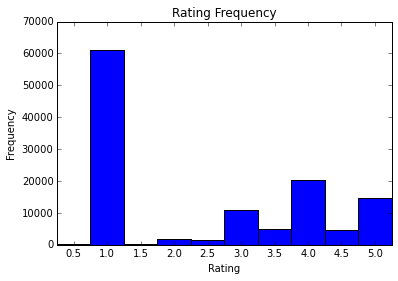

In [46]:
ratings = pd.read_csv("ml-latest/ratings.csv", delimiter=',', quotechar='"', names = ['userId', 'movieId', 'rating'])
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [35]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.70787060328
Bias and evidences: 2.63774259253 -0.0404916174235 2.11061962818
Positive Features
             Feature  Weights
0  Number of Ratings   0.8671
1             Horror   0.4401
2             Sci-Fi   0.4070
3     box-office-hit   0.2148
4            Fantasy   0.1816


Negative Features
    Feature  Weights
0  violence  -0.0405


## The Lowest Rating

In [37]:
j = indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  TURISTAS (2006)
Actual User Rating:  0.5
Predicted User Rating:  0.708781496659


### Movie Rating Distribution

In [38]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [39]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  0.708781496659
Bias and evidences: 2.63774259253 -1.92896109587 0.0
Positive Features
Empty DataFrame
Columns: [Feature, Weights]
Index: []
Negative Features
             Feature  Weights
0             Comedy  -0.8659
1              Drama  -0.3902
2      female-nudity  -0.2995
3          Animation  -0.2441
4             murder  -0.1188
5  Number of Ratings  -0.0104

## The case that has the most negative evidence, regardless of positive evidence

In [ ]:
j = np.argsort(neg_evi)[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

## The case that has the most positive evidence, regardless of negative evidence

In [ ]:
j = np.argsort(pos_evi)[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

# Most conflicted

In [ ]:
conflict = np.min([abs(neg_evi), pos_evi], axis=0)
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

# Least amount of info

In [ ]:
information = np.max([abs(neg_evi), pos_evi], axis=0)
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

## Defining movie matrix for unrated films

In [ ]:
user_cols = user_matrix.shape[1]
data = user_matrix[:, 1:(user_cols-1)]
target = user_matrix[:, (user_cols-1)]
user_rated = user_matrix[:, 0]-1
movie_file = open("postprocessed-data/movie_matrix", "r")
movie_matrix = pickle.load(movie_file)[:, 1:]
movie_file.close()

## Predicting unrated films using Lasso and 5 fold cross validation

In [ ]:
clf =TransparentLasso(min_lasso_alpha)
clf.fit(data,target)
all_pred = clf.predict(movie_matrix)
unrated_pred = np.delete(all_pred, user_rated, 0)
indices = np.argsort(unrated_pred)[::-1]
unrated_movies = np.delete(movies, user_rated, 0)
sorted_movies = unrated_movies[indices]
movie_df = pd.DataFrame(np.column_stack((sorted_movies,unrated_pred[indices])), columns = ['Movie', 'Prediction'])
print "Top predicted movies"
print movie_df.head(10)
print "Lowest predicted movies"
print movie_df.tail(10)